In [1]:
# Work for python 3
# use pandas to read csv file, easy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# sys.path.insert(0, '/path/to/application/app/folder')
# import sys
# sys.path.insert(0, 'try-tf')
# import plot_boundary_on_data1  

import pandas as pd

n_neighbors = 10

### This is fun!

In [2]:
# Get the data.
# train_data_filename = 'try-tf/simdata/linear_data_train.csv'
# test_data_filename = 'try-tf/simdata/linear_data_eval.csv'

# train_data_filename = 'try-tf/simdata/moon_data_train.csv'
# test_data_filename = 'try-tf/simdata/moon_data_eval.csv'

train_data_filename = 'data/saturn_data_train.csv'
test_data_filename = 'data/saturn_data_eval.csv'

In [3]:
# Extract it into numpy matrices.
# train_data,train_labels = plot_boundary_on_data1.extract_data(train_data_filename)
# test_data, test_labels = plot_boundary_on_data1.extract_data(test_data_filename)

In [3]:
train_dataset = pd.read_csv(train_data_filename)
test_dataset = pd.read_csv(test_data_filename)

In [4]:
train_dataset.head()

,1,-7.1239700674365,-5.05175898010314
0,0,1.807716,0.770506
1,1,8.431848,-4.228779
2,0,0.451276,0.669574
3,0,1.525200,-0.953056
4,0,2.624464,-3.575172


#### Show the first 5 rows of data

In [5]:
test_dataset.head()

,0,-2.95364440838872,0.4240724153547
0,1,9.053243,3.833230
1,1,-9.418988,-5.152922
2,0,0.025914,0.013177
3,1,-5.985821,9.748727
4,1,-7.491018,-5.483945


In [6]:
#Seperating dependent and independent variables. 

train_data = train_dataset.iloc[:, 1:3].values  #Note: 
train_labels = train_dataset.iloc[:, 0].values

test_data = test_dataset.iloc[:, 1:3].values  #Note: 
test_labels = test_dataset.iloc[:, 0].values

In [7]:
train_labels[0:5]

array([0, 1, 0, 0, 0])

In [8]:
# Neighbours Classifier and fit the data.
knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(train_data,train_labels)

KNeighborsClassifier(n_neighbors=10)

In [9]:
X = train_data
y = train_labels

In [10]:
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#### Show the data

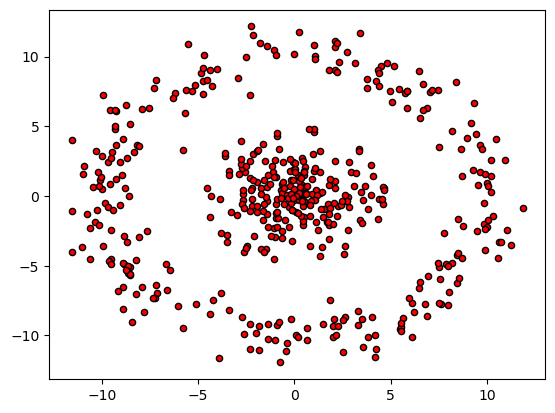

In [11]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1],c='r',
    cmap=cmap_bold, edgecolor='k', s=20)
plt.show()

In [12]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

In [13]:
Z = Z.reshape(xx.shape)

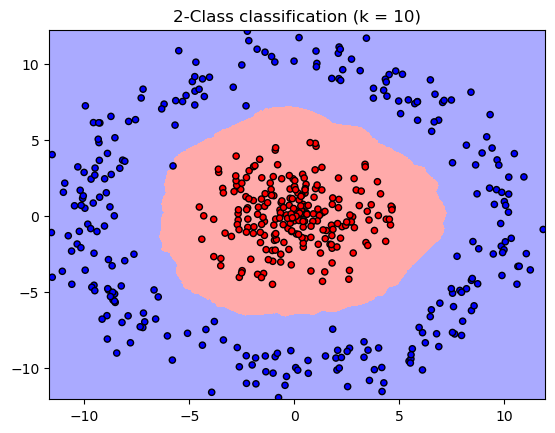

In [14]:
# Put the result into a color plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1],c=y,
    cmap=cmap_bold, edgecolor='k', s=20)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % n_neighbors)

plt.show()